In [127]:
from __future__ import division


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , recall_score , precision_score , f1_score, precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')
c=(0.48366628618847957, 0.1286467902201389, 0.31317188565991266)

Klasifikasi hujan atau tidak besok

In [128]:
pd.set_option('display.max_columns', None)

In [129]:
data=pd.read_csv("weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [131]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [132]:
nans = data.isna().sum().sort_values(ascending=False)
pct = nans * 100 / data.shape[0]
uniques = data.nunique()
noted = pd.concat([nans, pct, uniques, data.dtypes], axis=1)
noted.columns = ['Null count', 'Null percentage', 'n_unique values', 'data_type']
noted

,Null count,Null percentage,n_unique values,data_type
Sunshine,69835,48.009762,145,float64
Evaporation,62790,43.166506,358,float64
Cloud3pm,59358,40.807095,10,float64
Cloud9am,55888,38.421559,10,float64
Pressure9am,15065,10.356799,546,float64
Pressure3pm,15028,10.331363,549,float64
WindDir9am,10566,7.263853,16,object
WindGustDir,10326,7.098859,16,object
WindGustSpeed,10263,7.055548,67,float64
Humidity3pm,4507,3.098446,101,float64


In [133]:
print('number of rows in datasey', data.shape[0])
print('number of cols in datasey', data.shape[1])

number of rows in datasey 145460
number of cols in datasey 23


Menanganani nilai yang hilang dan outlier

In [134]:
data.duplicated().sum()

0

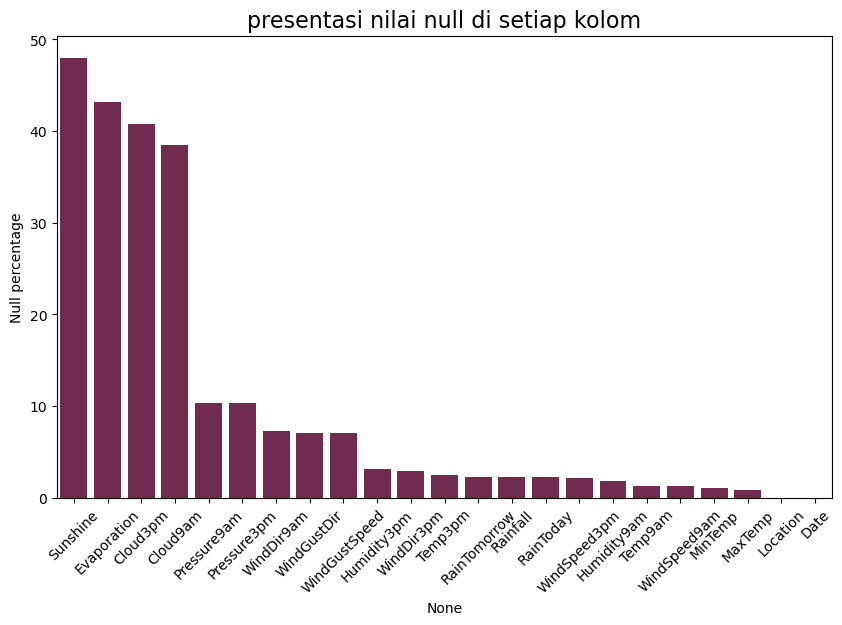

In [135]:
plt.figure(figsize=(10,6))
sns.barplot(x=noted.index,y=noted['Null percentage'],color=c)
plt.xticks(rotation=45)
plt.title('presentasi nilai null di setiap kolom', fontsize=16)
plt.show()

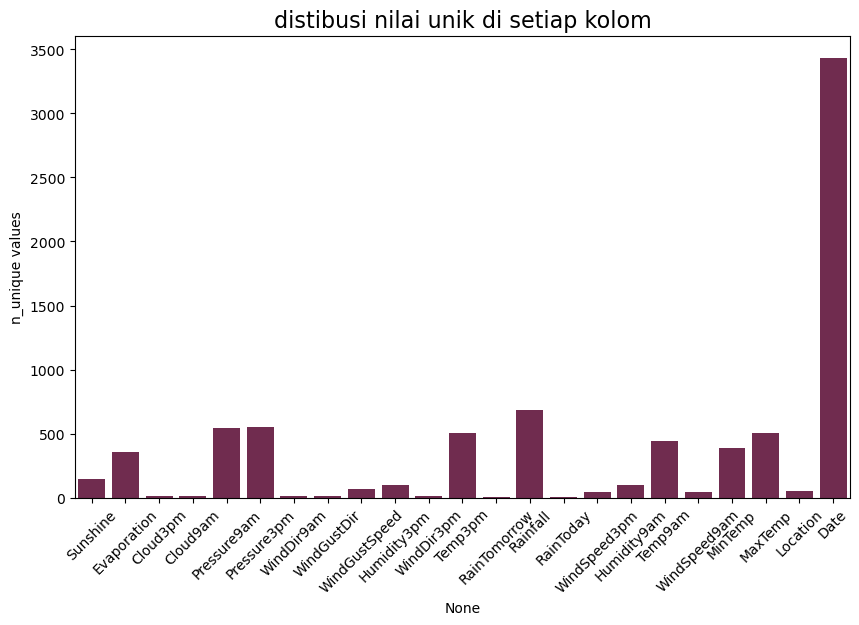

In [136]:
plt.figure(figsize=(10,6))
sns.barplot(x=noted.index,y=noted['n_unique values'],color=c)
plt.xticks(rotation=45)
plt.title('distibusi nilai unik di setiap kolom', fontsize=16)
plt.show()

In [137]:
def impute_missing(df):
    loc_unique = df['Location'].unique()
    num_col = df.select_dtypes(exclude='object').columns
    cat_col = df.select_dtypes(include='object').columns

    for col in num_col:
        for loc in loc_unique:
            filt = df['Location'].isin([loc])
            med = df[filt][col].median()
            df.loc[filt, col] = df[filt][col].fillna(med)
    
    for col in cat_col:
        for loc in loc_unique:
            filt = df['Location'].isin([loc])
            if df[filt][col].empty:
                continue  # Skip to next location if empty
            mode = df[filt][col].mode()
            if not mode.empty:
                med = mode[0]
                df.loc[filt, col] = df[filt][col].fillna(med)
    
    return df


In [138]:
data=impute_missing(data)

In [139]:
remaining_nulls=data.isnull().sum().sort_values(ascending=False)

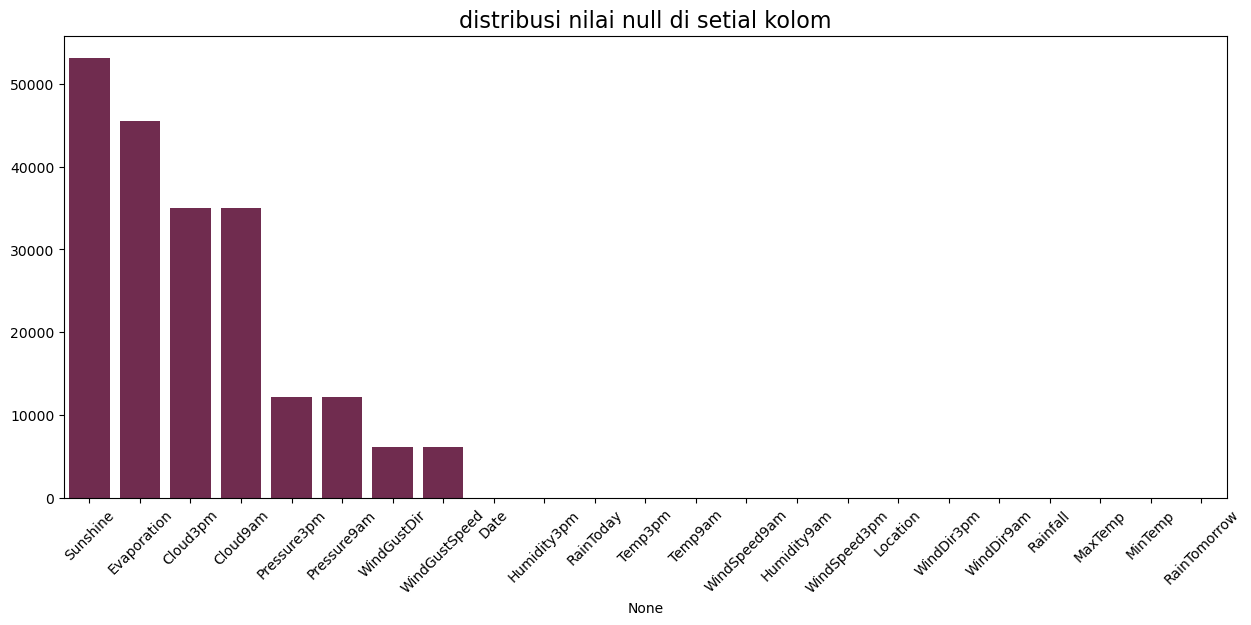

In [140]:
plt.figure(figsize=(15,6))
sns.barplot(x=remaining_nulls.index,y=remaining_nulls.values,color=c)
plt.xticks(rotation=45)
plt.title('distribusi nilai null di setial kolom', fontsize=16)
plt.show()

In [141]:
data.dropna(subset=['WindGustDir' , 'WindGustSpeed' , 'WindDir9am', 'WindDir3pm' , 'Pressure9am' , 'Pressure3pm' , 'RainToday' ,  'RainTomorrow', 'Evaporation','Sunshine', 'Cloud9am' , 'Cloud3pm'], inplace=True  , axis= 0)

In [142]:
data['Date'] = pd.to_datetime(data['Date'] )

In [143]:
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['year']=data['Date'].dt.year

In [144]:
data.drop('Date',axis=1,inplace=True)

In [145]:
num_col = data.select_dtypes(exclude='object').columns
cat_col = data.select_dtypes(include='object').columns

In [146]:
len(num_col)

19

[]

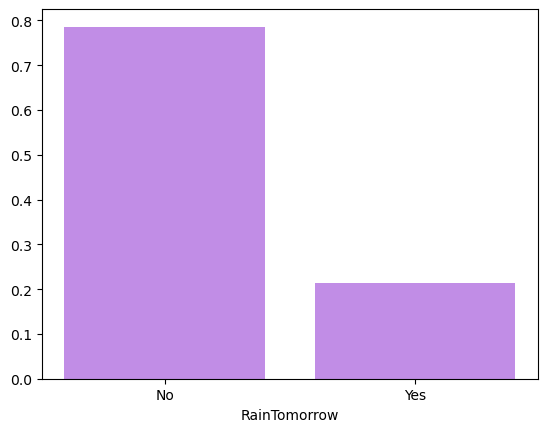

In [147]:
colors = sns.color_palette('husl', len(num_col))
co=data['RainTomorrow'].value_counts()/data['RainTomorrow'].count()
sns.barplot(x=co.index,y=co.values,color=colors[idx])
plt.plot()

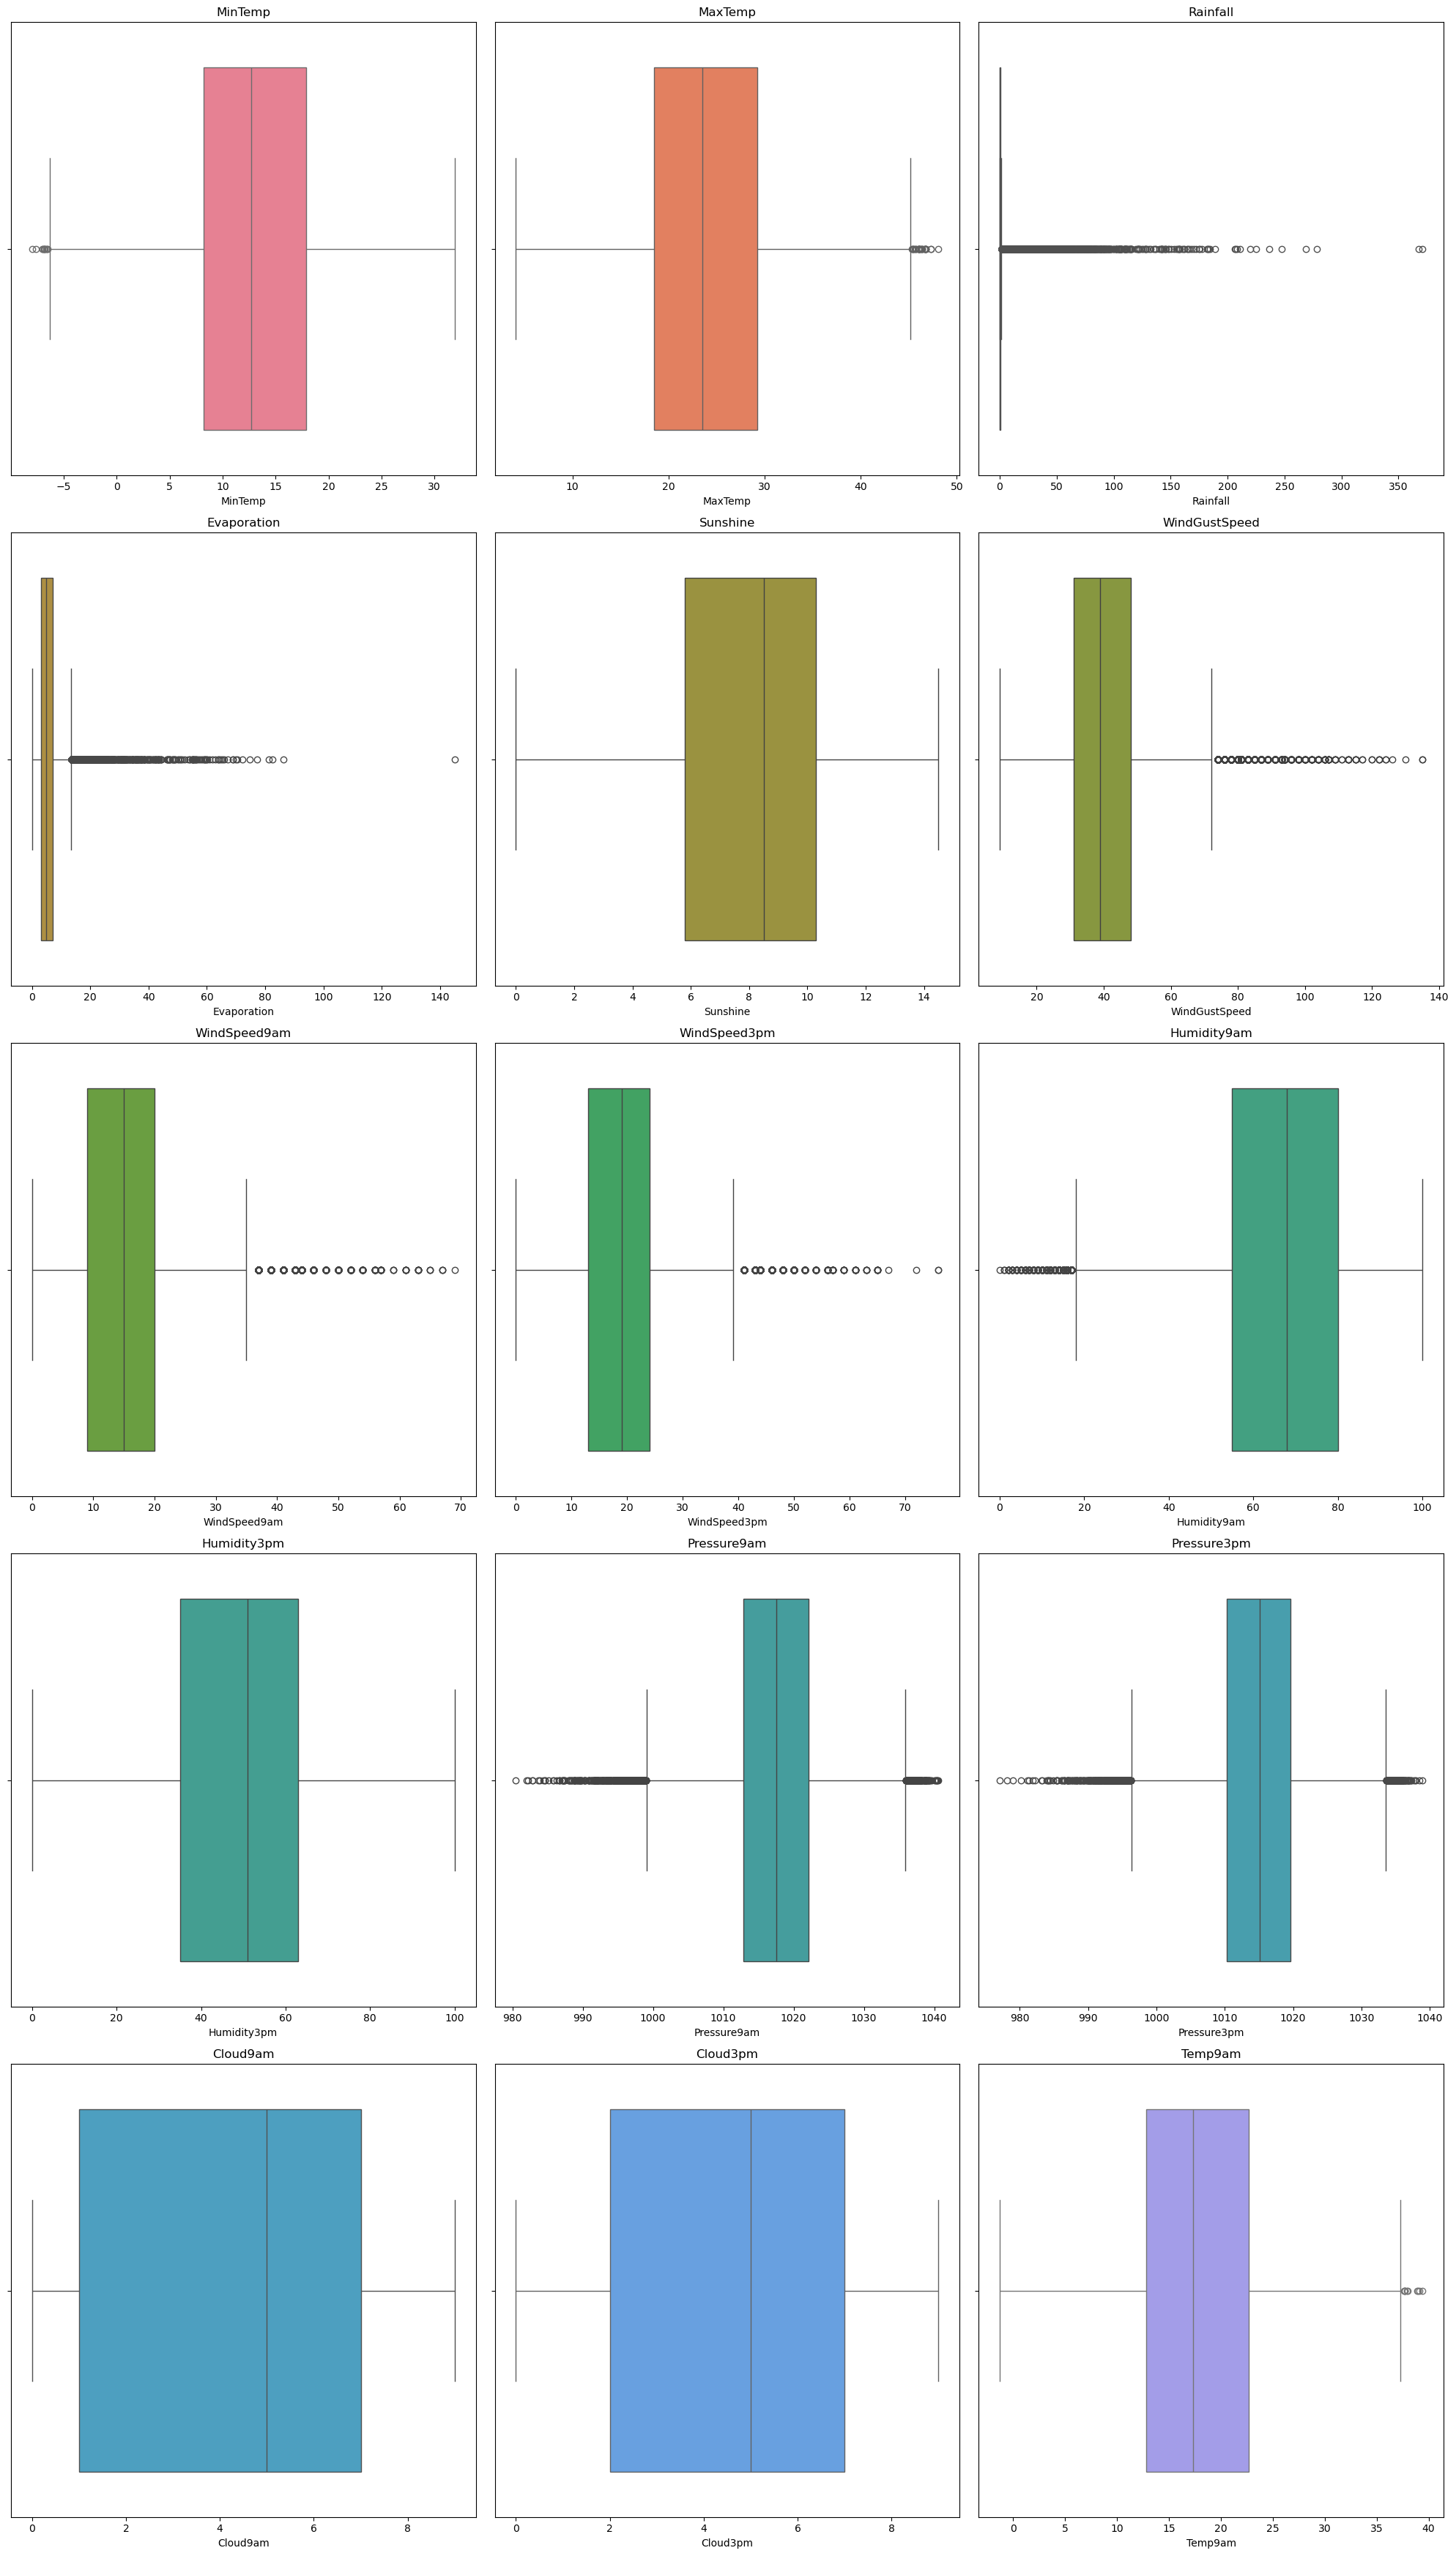

In [148]:
colors = sns.color_palette('husl', len(num_col))
fig, ax = plt.subplots(5, 3, figsize=(20, 35))
idx = 0
for i in range(5):
    for j in range(3):
        if idx < len(num_col):
            sns.boxplot(ax=ax[i, j], x=data[num_col[idx]], color=colors[idx])
            ax[i, j].set_title(num_col[idx])
            idx = idx + 1
plt.tight_layout()
plt.show()

Menangani outliers

In [149]:
def handle_outliers(data,impute_strategy='median'):
    num_col = data.select_dtypes(exclude='object').columns
    for col in num_col:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = np.where(z_scores > 2)[0]  

        if len(outliers) == 0:
            continue 
            
        if impute_strategy == 'median':
            imputed_value = df[col].median()
        elif impute_strategy == 'mean':
            imputed_value = df[col].mean()
            
        data.loc[outliers, col] = imputed_value

    return data

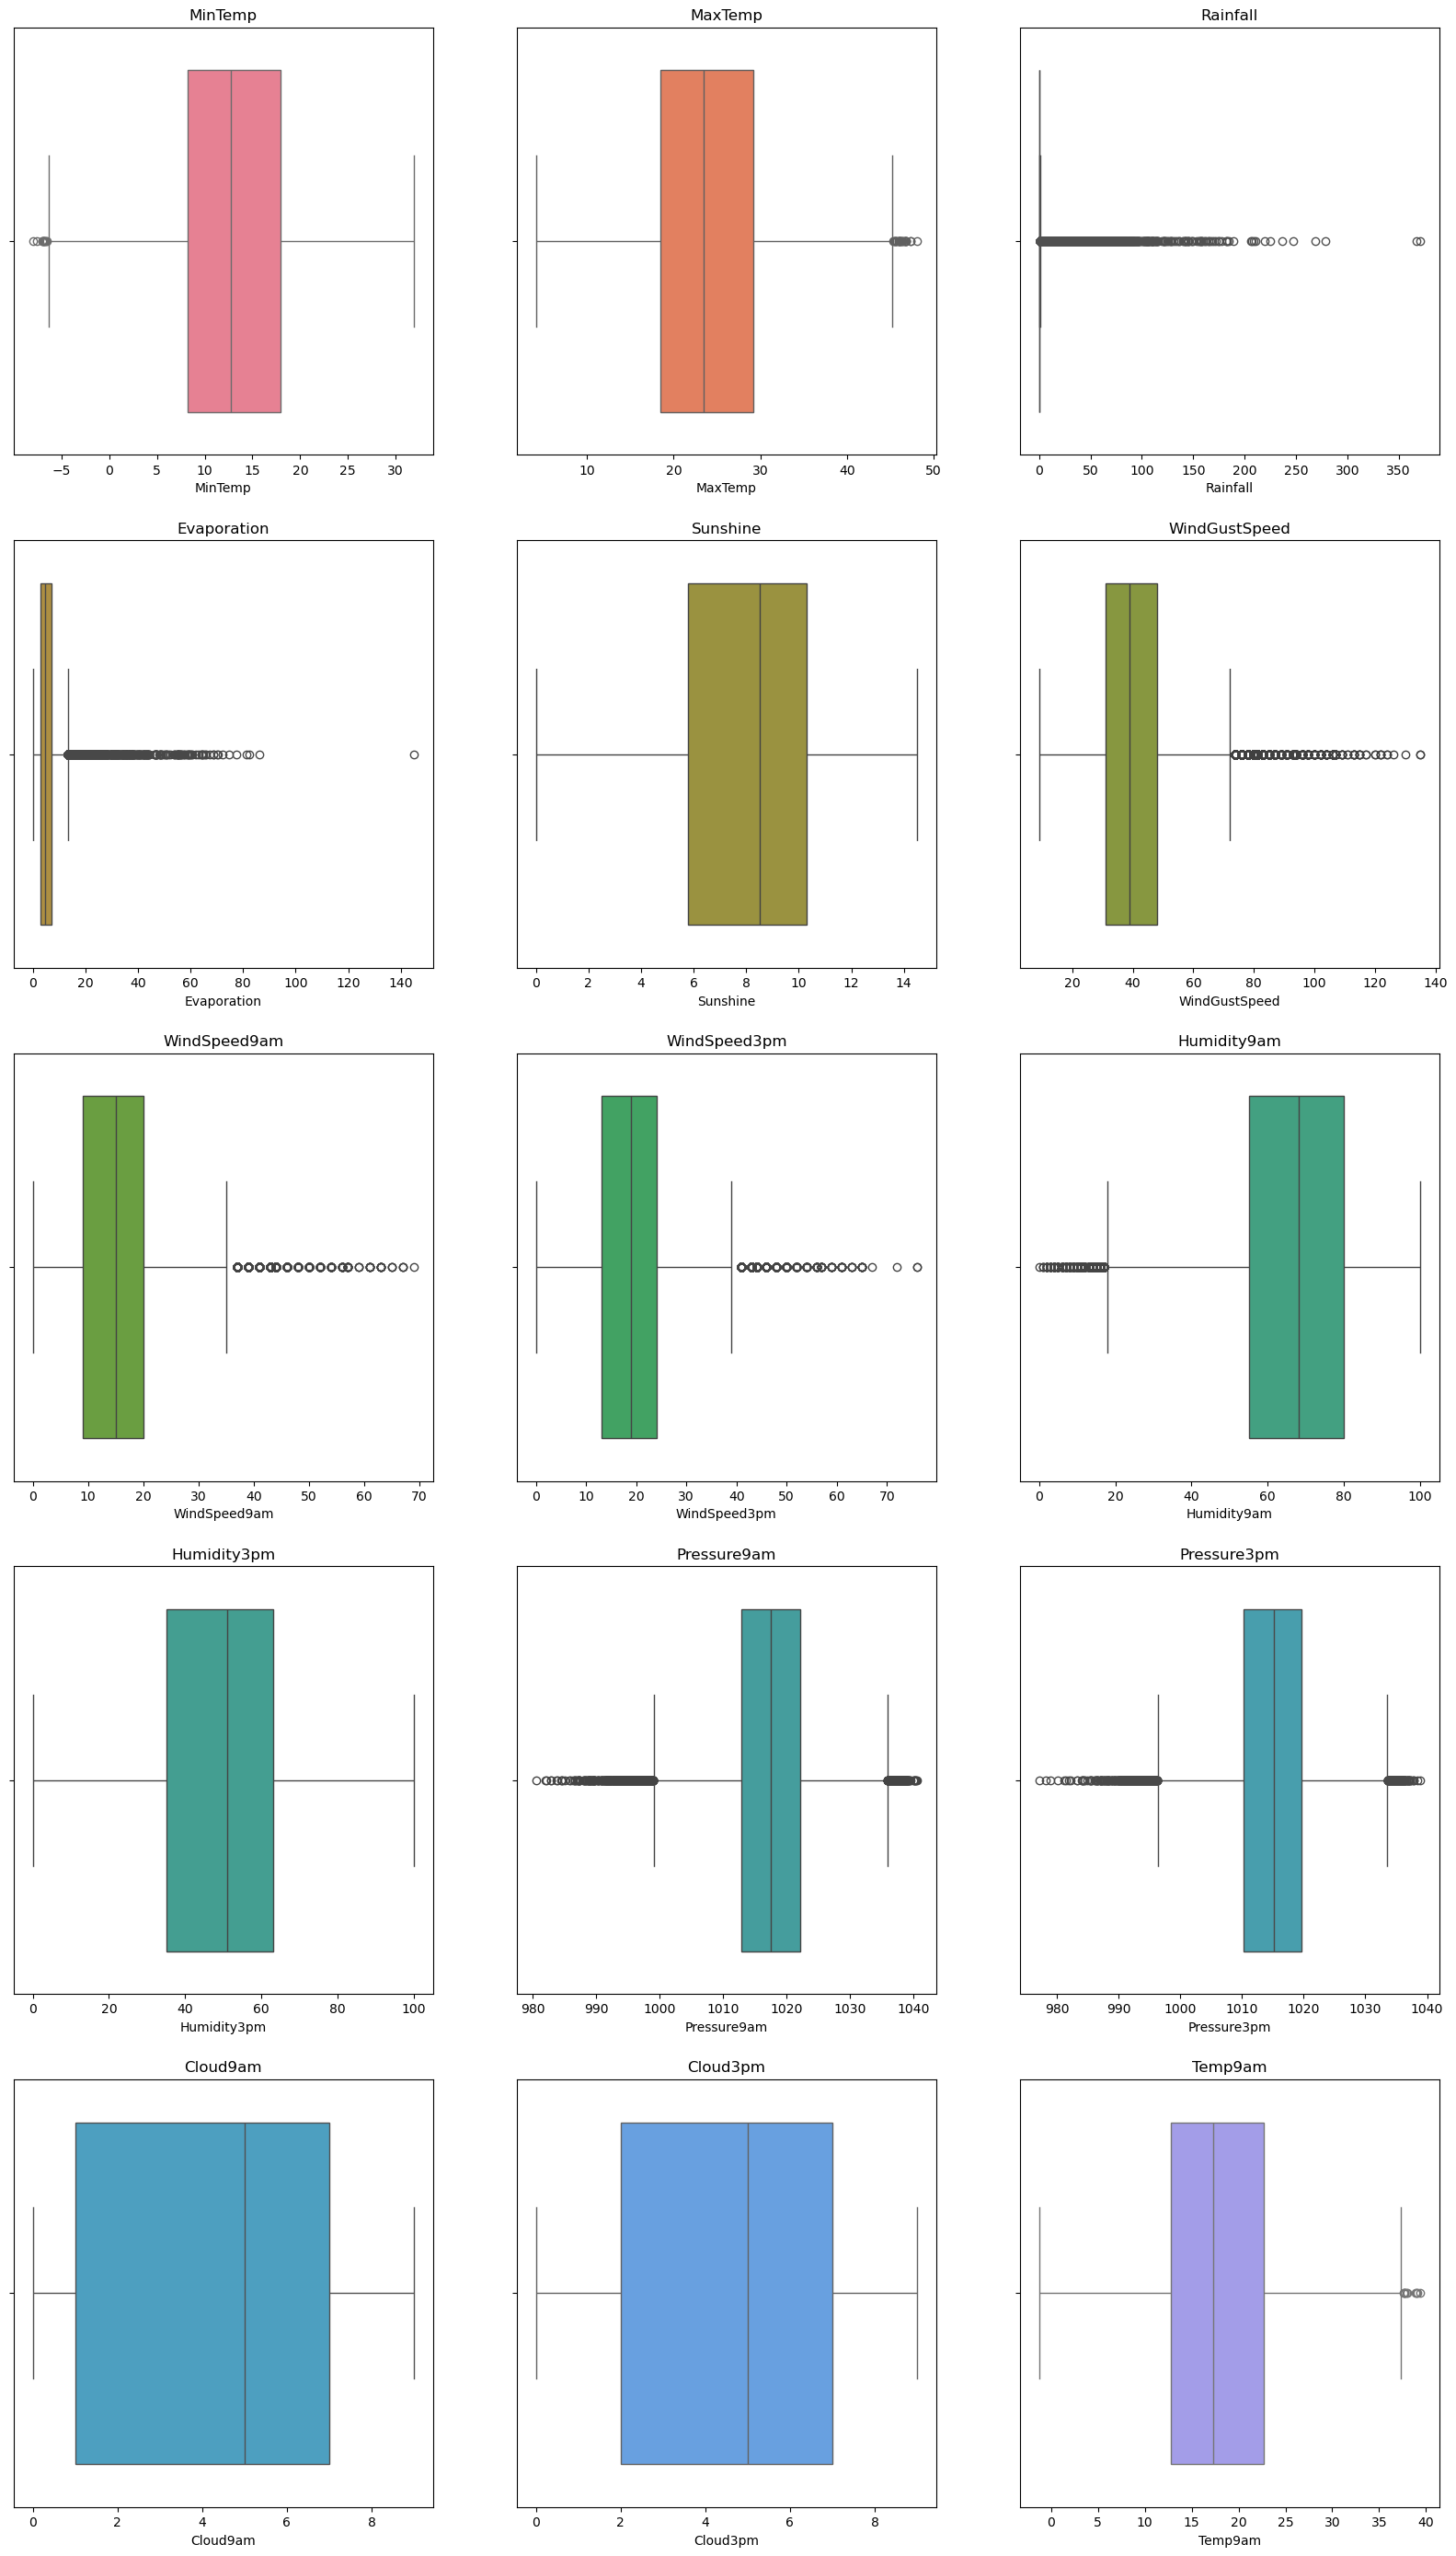

In [166]:
colors = sns.color_palette('husl', len(num_col))
fig,ax=plt.subplots(5,3,figsize=(20,35))
idx=0
for i in range(5):
    for j in range(3):
        sns.boxplot(ax=ax[i, j], x=data[num_col[idx]],color=colors[idx])
        ax[i, j].set_title(num_col[idx])
        idx=idx+1


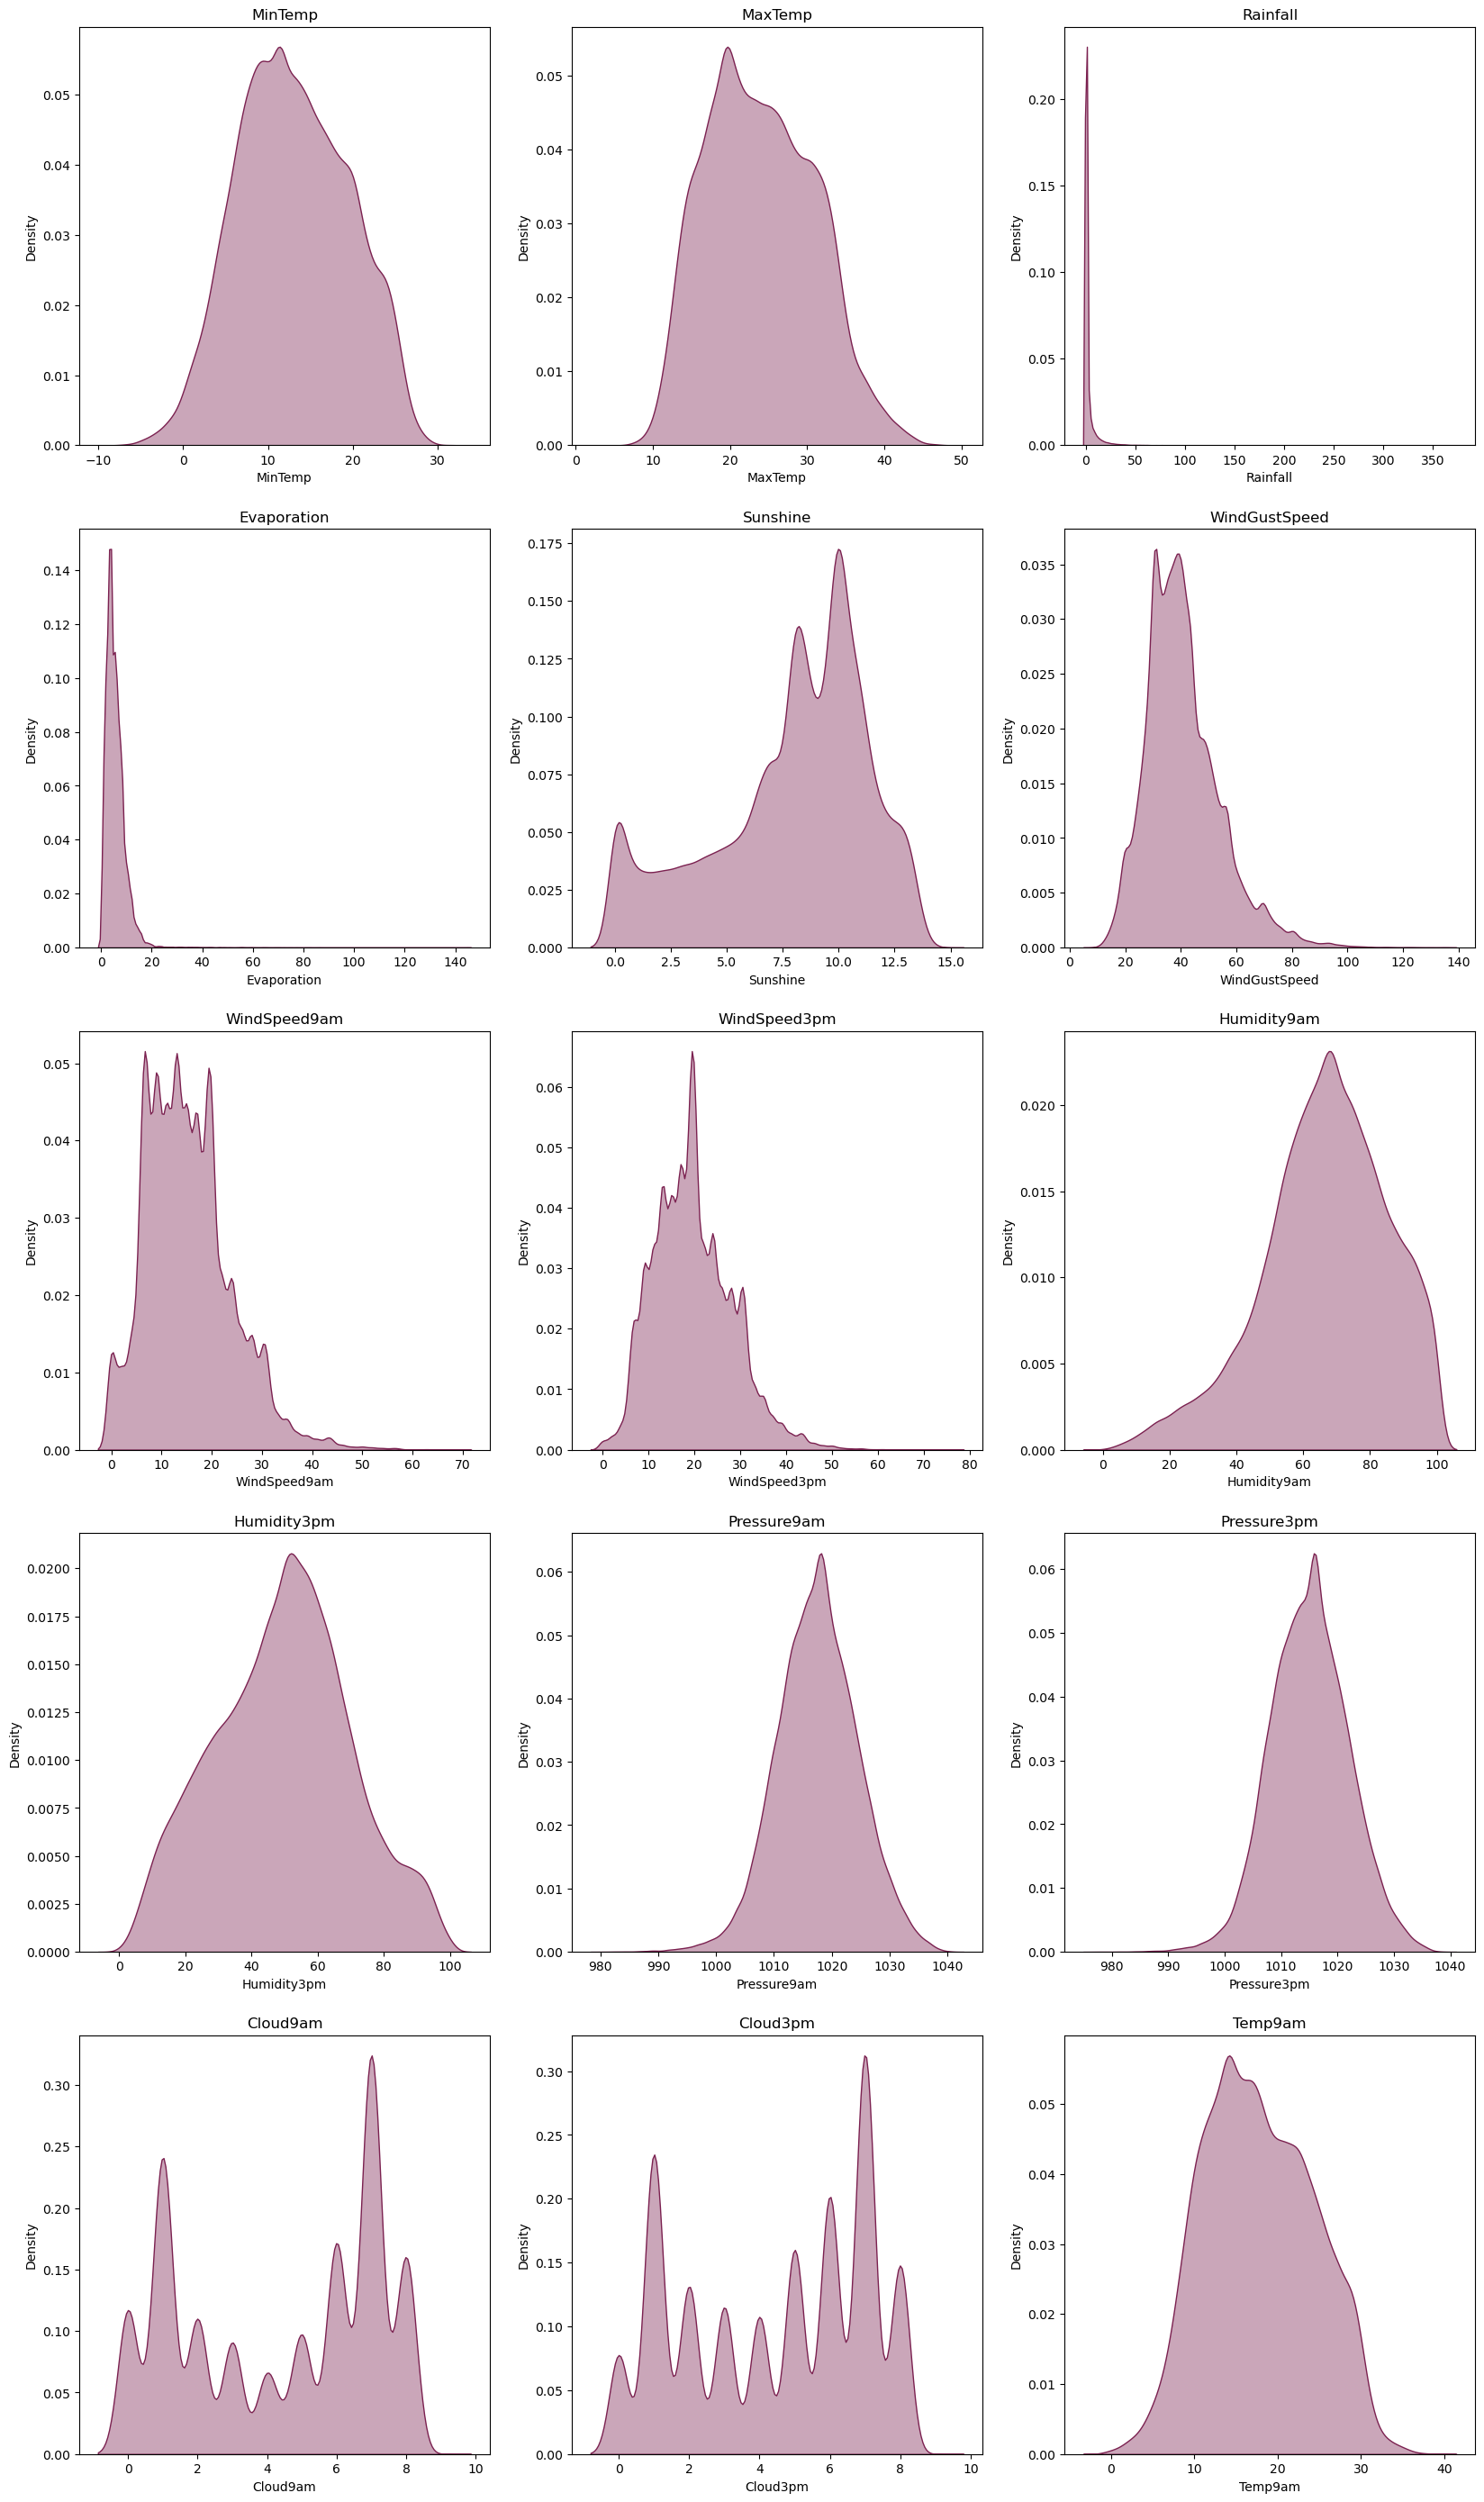

In [151]:
def handle_outlires_IQR(data):
    num_col = data.select_dtypes(exclude='object').columns
    for col in num_col:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        TQR=1.5*IQR
        outliers = data[ ( data[col] < (Q1 -IQR)) | (data[col] > (Q3 +IQR) ) ][col]
        med_value=data[col].median()
        data[data[col].isin([outliers])][col]=med_value
    return data

data=handle_outlires_IQR(data)

fig,ax=plt.subplots(5,3,figsize=(20,35))
idx=0
for i in range(5):
    for j in range(3):
        sns.kdeplot(ax=ax[i, j], x=data[num_col[idx]],color=c,alpha=0.4,fill=True)
        ax[i, j].set_title(num_col[idx])
        idx=idx+1
    



In [152]:
num_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
]
        
)
num_pipeline

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [153]:
cat_pipeline=Pipeline( steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])
cat_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder())])

In [154]:
features=data.drop('RainTomorrow',axis=1)
labels=data['RainTomorrow']

num_col = features.select_dtypes(exclude='object').columns
cat_col = features.select_dtypes(include='object').columns

x_train,x_test,y_train,y_test =train_test_split(features,labels,test_size=0.30,random_state=42)

In [155]:
col_transformer=ColumnTransformer(
    transformers=[('num_pipeline',num_pipeline,num_col)
                ,('cat_pipeline',cat_pipeline,cat_col)
                ]
    , remainder='passthrough',n_jobs=-1

)
col_transformer

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])

In [156]:
rf = RandomForestClassifier(random_state=42)

pipefinal=make_pipeline(col_transformer,rf)
pipefinal

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressur...ud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

Modelling dan evaluasi 

In [157]:
pipefinal.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressur...ud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

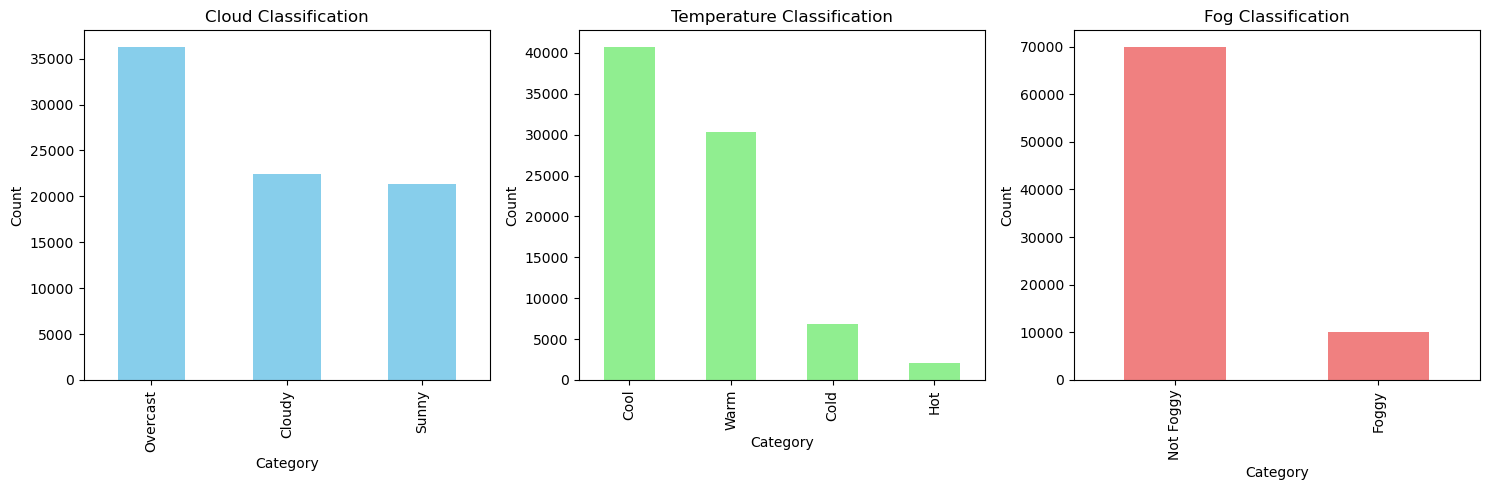

In [168]:
def classify_cloud(row):
    if row['Cloud9am'] >= 7 or row['Cloud3pm'] >= 7:
        return 'Overcast'
    elif row['Cloud9am'] >= 4 or row['Cloud3pm'] >= 4:
        return 'Cloudy'
    else:
        return 'Sunny'

def classify_temperature(row):
    avg_temp = (row['MinTemp'] + row['MaxTemp']) / 2
    if avg_temp >= 30:
        return 'Hot'
    elif avg_temp >= 20:
        return 'Warm'
    elif avg_temp >= 10:
        return 'Cool'
    else:
        return 'Cold'

def classify_fog(row):
    if row['Humidity9am'] >= 90 or row['Humidity3pm'] >= 90:
        return 'Foggy'
    else:
        return 'Not Foggy'

# Apply classification functions
data['CloudClassification'] = data.apply(classify_cloud, axis=1)
data['TempClassification'] = data.apply(classify_temperature, axis=1)
data['FogClassification'] = data.apply(classify_fog, axis=1)

# Plotting the classifications
plt.figure(figsize=(15, 5))

# Cloud Classification plot
plt.subplot(1, 3, 1)
cloud_counts = data['CloudClassification'].value_counts()
cloud_counts.plot(kind='bar', color='skyblue')
plt.title('Cloud Classification')
plt.xlabel('Category')
plt.ylabel('Count')

# Temperature Classification plot
plt.subplot(1, 3, 2)
temp_counts = data['TempClassification'].value_counts()
temp_counts.plot(kind='bar', color='lightgreen')
plt.title('Temperature Classification')
plt.xlabel('Category')
plt.ylabel('Count')

# Fog Classification plot
plt.subplot(1, 3, 3)
fog_counts = data['FogClassification'].value_counts()
fog_counts.plot(kind='bar', color='lightcoral')
plt.title('Fog Classification')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [158]:
pred=pipefinal.predict(x_test)

print('Accuracy Score :', accuracy_score(y_test, pred) , '\n')
print('Classification Report :', '\n',classification_report(y_test, pred))

Accuracy Score : 0.8624437781109445 

Classification Report : 
               precision    recall  f1-score   support

          No       0.88      0.96      0.92     18909
         Yes       0.77      0.51      0.61      5103

    accuracy                           0.86     24012
   macro avg       0.82      0.73      0.76     24012
weighted avg       0.85      0.86      0.85     24012

